## The Himmelblau function

In this demo, we are interested in minimizing the Himmelblau function. The  [Himmelblau](https://en.wikipedia.org/wiki/Himmelblau%27s_function) function is
used to test the performance of optimization algorithms and is named after David Himmelblau (1924–2011), who introduced it.


The  function is defined as:
\begin{align} z = (x^2+y-11)^2 + (x+y^2-7)^2\;. \end{align}


Below we define the function.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D


def Himmelblau_func(x,y):
    z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return z


Let us visualize the function to understand it better.
Below, we plot the function (3D and contour plot) in the range $[-6,6]\times[-6,6]$

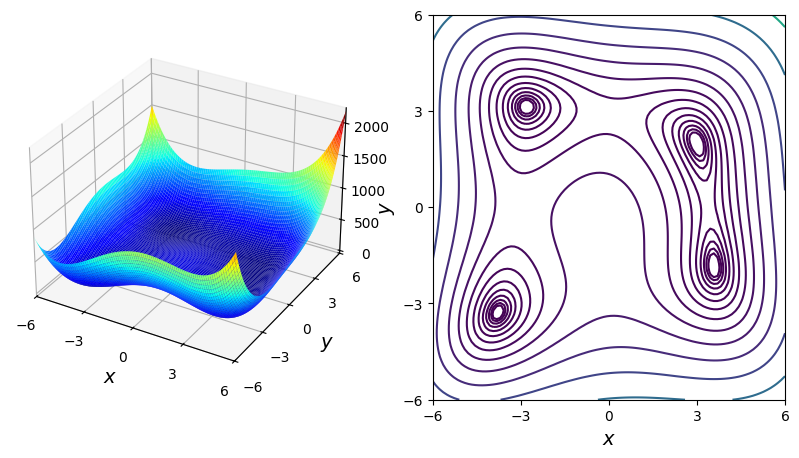

In [2]:
x_plt_array = np.linspace(-6,6,100)
y_plt_array = np.linspace(-6,6,100)
x_mesh, y_mesh = np.meshgrid(x_plt_array,y_plt_array)
z_mesh = Himmelblau_func(x_mesh,y_mesh)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap="jet", rstride=1, cstride=1)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.xticks([-6, -3, 0, 3, 6])
plt.yticks([-6, -3, 0, 3, 6])
plt.xlim([-6, 6])
plt.ylim([-6, 6])



ax2 = fig.add_subplot(122)
levels = np.logspace(0.3, 3.5, 15)
plt.contour(x_mesh, y_mesh, z_mesh, levels, cmap="viridis")
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.xticks([-6, -3, 0, 3, 6])
plt.yticks([-6, -3, 0, 3, 6])
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.show()

If you study the contour plot on the right, you notice that the Himmelblau function has four minimas. 

## gradient
The gradient of the Himmelblau function can be obtained easily as
\begin{align}
\frac{\partial z}{\partial x} &= 2\times2x\times(x^2+y-11) + 2(x+y^2-7) = 
\boxed{4x^3+2y^2+4xy-42x-14}\\
\frac{\partial z}{\partial y} &= 2(x^2+y-11) + 2\times2y\times(x+y^2-7) = 
\boxed{4y^3+2x^2+4xy-26y-22}\\
\end{align}

The function below computes the gradient for us.

In [3]:
def Himmelblau_grad(x,y):
    dzdx = 4*x**3 + 2*y**2 + 4*x*y -42*x -14
    dzdy = 4*y**3 + 2*x**2 + 4*x*y -26*y -22
    return dzdx, dzdy  

Now, with the gradient at our disposal, we can minimize this function using the GD algorithm. We recall that in the GD, we update according to (custimized for our notations here)
\begin{align}
x &\gets x - \eta\frac{\partial z}{\partial x}\\
y &\gets y - \eta\frac{\partial z}{\partial y}
\end{align}

The learning rate $\eta$ is a hyperparameter of the algorithm. We set it to $0.01$ here. 
Below, we start from the point $\big(x_0=0, y_0=3\big)$ and perform 20 iterations of the GD. 

In [8]:
# Take max_iter steps of GD with learning rate lr.
max_iter = 20
lr = 0.01

x_GD, y_GD = 0,-1
x_array, y_array,  z_array = [], [], [] #to store the path taken by GD

for iter in range(max_iter):
    tmp_z = Himmelblau_func(x_GD,y_GD)
    
    dzdx, dzdy = Himmelblau_grad(x_GD,y_GD)
    x_GD = x_GD - lr*dzdx
    y_GD = y_GD - lr*dzdy
    
    x_array.append(x_GD)
    y_array.append(y_GD)
    z_array.append(tmp_z)
    print(f'iter:{iter:3} : z -> {z_array[-1]:.3f}, (x,y) ->({x_array[-1]:.3f},{y_array[-1]:.3f})')

iter:  0 : z -> 180.000, (x,y) ->(0.120,-1.000)
iter:  1 : z -> 178.229, (x,y) ->(0.295,-0.995)
iter:  2 : z -> 174.458, (x,y) ->(0.550,-0.985)
iter:  3 : z -> 166.509, (x,y) ->(0.917,-0.967)
iter:  4 : z -> 150.312, (x,y) ->(1.428,-0.944)
iter:  5 : z -> 120.047, (x,y) ->(2.087,-0.922)
iter:  6 : z -> 73.773, (x,y) ->(2.800,-0.921)
iter:  7 : z -> 27.904, (x,y) ->(3.324,-0.963)
iter:  8 : z -> 8.394, (x,y) ->(3.500,-1.050)
iter:  9 : z -> 5.785, (x,y) ->(3.520,-1.155)
iter: 10 : z -> 4.661, (x,y) ->(3.530,-1.259)
iter: 11 : z -> 3.596, (x,y) ->(3.539,-1.358)
iter: 12 : z -> 2.644, (x,y) ->(3.548,-1.449)
iter: 13 : z -> 1.849, (x,y) ->(3.555,-1.530)
iter: 14 : z -> 1.230, (x,y) ->(3.562,-1.600)
iter: 15 : z -> 0.780, (x,y) ->(3.567,-1.658)
iter: 16 : z -> 0.473, (x,y) ->(3.571,-1.705)
iter: 17 : z -> 0.276, (x,y) ->(3.575,-1.741)
iter: 18 : z -> 0.156, (x,y) ->(3.577,-1.769)
iter: 19 : z -> 0.086, (x,y) ->(3.579,-1.791)


Seems like a very reasonable result (as the function is non-negative so its minimum cannot be less than 0!). How about we plot the steps taken by the algorithm to understand it better.

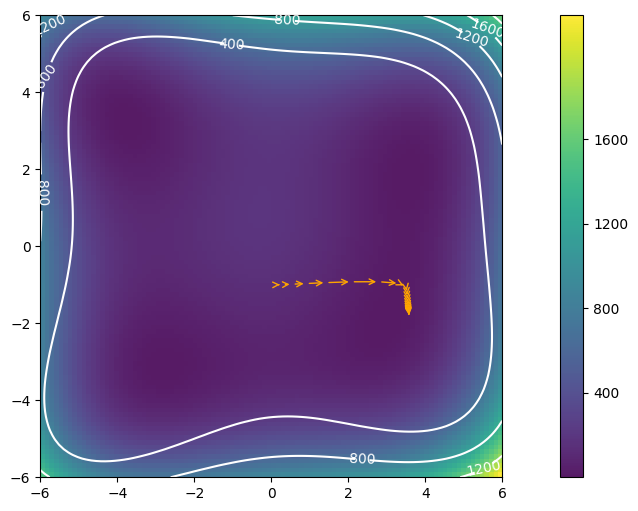

In [9]:
fig = plt.figure(3,figsize=(15, 6))
contours = plt.contour(x_mesh, y_mesh, z_mesh, 6, colors='white')
plt.clabel(contours)
plt.imshow(z_mesh, extent=[-6, 6, -6, 6], cmap='viridis', alpha=0.90)
plt.colorbar(ticks=np.arange(0, 2000, 400).tolist())
for iter in range(max_iter-1):
    xy_arrow0 = [x_array[iter], y_array[iter]]
    xy_arrow1 = [x_array[iter+1], y_array[iter+1]]
    plt.annotate('', xy=xy_arrow1, xytext=xy_arrow0,
                   arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 1},
                   va='center', ha='center')

## Questions
1. what will happen if you start from $(x_0=0,y_0=0)$?
1. what will happen if you start from $(x_0=0,y_0=-1)$?